In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D
import xarray as xr
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# open dataset
dataset = xr.open_dataset('./kazar-data-concat-mar13-mar14.nc')

# get reflectivity, doppler velocity and spectral width variables
reflectivity = dataset['reflectivity_best_estimate'] #dBZ
spectral_width = dataset['spectral_width'] #m/s
doppler_velocity = dataset['mean_doppler_velocity'] #m/s
lwp = dataset['mwr_lwp'] #g/m^2
precip_rate = dataset['precip_mean'] #mm/hr
height = dataset['height']

### _Reflectivity groupings by times (23 developing, 17 decay and 17 Mature)_

In [3]:
# Developing for reflectivity
ref_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:31:00'), # 3
    ('2020-03-13 09:29:36', '2020-03-13 09:58:16'), # 4
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), # 7
    ('2020-03-13 11:23:32', '2020-03-13 11:32:28'), # 10
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), # 11
    ('2020-03-13 12:03:08', '2020-03-13 12:15:00'), # 13
    ('2020-03-13 12:52:56', '2020-03-13 13:14:32'), # 16
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), # 18
    ('2020-03-13 15:54:36', '2020-03-13 15:58:08'), # 21
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), # 23
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), # 24
    ('2020-03-13 16:53:20', '2020-03-13 17:13:32'), # 27
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), # 31
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), # 34
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), # 35
    ('2020-03-13 20:14:12', '2020-03-13 20:32:32'), # 36
    ('2020-03-13 20:26:44', '2020-03-13 20:48:12'), # 37
    ('2020-03-13 20:50:16', '2020-03-13 20:59:28'), # 38
    ('2020-03-13 20:48:36', '2020-03-13 21:19:56'), # 39
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), # 42
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), # 50
    ('2020-03-14 02:43:24', '2020-03-14 03:00:44'), # 51
    ('2020-03-14 03:17:16', '2020-03-14 03:37:04'), # 52
]



# Mature cells for reflectivity
ref_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 08:34:48'), # 1
    ('2020-03-13 08:32:08', '2020-03-13 09:06:36'), # 2
    ('2020-03-13 11:00:32', '2020-03-13 11:26:20'), # 9
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), # 12
    ('2020-03-13 12:12:24', '2020-03-13 12:38:04'), # 14
    ('2020-03-13 12:32:48', '2020-03-13 12:56:36'), # 15
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), # 17
    ('2020-03-13 15:09:36', '2020-03-13 15:19:08'), # 19
    ('2020-03-13 15:17:16', '2020-03-13 15:45:20'), # 20
    ('2020-03-13 16:44:24', '2020-03-13 16:57:56'), # 26
    ('2020-03-13 21:48:20', '2020-03-13 21:59:08'), # 43
    ('2020-03-13 21:57:40', '2020-03-13 22:13:00'), # 44
    ('2020-03-13 22:38:08', '2020-03-13 23:00:00'), # 46
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), # 49
    ('2020-03-14 03:57:16', '2020-03-14 04:18:04'), # 54
    ('2020-03-14 04:12:56', '2020-03-14 04:31:56'), # 55
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), # 56
]




# Decaying cells for reflectivity
ref_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), # 5
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), # 6
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), # 8
    ('2020-03-13 15:58:12', '2020-03-13 16:02:36'), # 22
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), # 25
    ('2020-03-13 17:12:56', '2020-03-13 17:22:56'), # 28
    ('2020-03-13 17:13:36', '2020-03-13 17:45:48'), # 29
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), # 30
    ('2020-03-13 18:47:08', '2020-03-13 18:54:48'), # 32
    ('2020-03-13 18:54:04', '2020-03-13 18:57:08'), # 33
    ('2020-03-13 21:07:00', '2020-03-13 21:11:04'), # 40
    ('2020-03-13 21:16:00', '2020-03-13 21:21:40'), # 41
    ('2020-03-13 22:28:24', '2020-03-13 22:39:36'), # 45
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), # 47
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), # 48
    ('2020-03-14 03:33:36', '2020-03-14 03:41:20'), # 53
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48'), # 57
]


In [4]:
f"developing cells: {len(ref_time_ranges_developing)},  matured cells: {len(ref_time_ranges_matured)}, decaying cell : {len(ref_time_ranges_decay)} = {len(ref_time_ranges_developing)+len(ref_time_ranges_matured)+ len(ref_time_ranges_decay)} cells"

'developing cells: 23,  matured cells: 17, decaying cell : 17 = 57 cells'

### _Doppler velocity groupings by times (23 developing,  20 Mature and 14 decay)_

In [5]:
# Developing for doppler velocity
vel_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:31:00'), # 3
    ('2020-03-13 09:29:36', '2020-03-13 09:58:16'), # 4
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), # 8
    ('2020-03-13 11:23:32', '2020-03-13 11:32:28'), # 10
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), # 11
    ('2020-03-13 12:52:56', '2020-03-13 13:14:32'), # 16
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), # 18
    ('2020-03-13 15:54:36', '2020-03-13 15:58:08'), # 21
    ('2020-03-13 15:58:12', '2020-03-13 16:02:36'), # 22
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), # 23
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), # 24
    ('2020-03-13 16:53:20', '2020-03-13 17:13:32'), # 27
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), # 30
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), # 31
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), # 34
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), # 35
    ('2020-03-13 20:26:44', '2020-03-13 20:48:12'), # 37
    ('2020-03-13 20:50:16', '2020-03-13 20:59:28'), # 38
    ('2020-03-13 20:48:36', '2020-03-13 21:19:56'), # 39
    ('2020-03-13 21:16:00', '2020-03-13 21:21:40'), # 41
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), # 42
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), # 48
    ('2020-03-14 03:33:36', '2020-03-14 03:41:20'), # 53
]



# Mature cells for doppler velocity
vel_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 08:34:48'), # 1
    ('2020-03-13 08:32:08', '2020-03-13 09:06:36'), # 2
    ('2020-03-13 11:00:32', '2020-03-13 11:26:20'), # 9
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), # 12
    ('2020-03-13 12:03:08', '2020-03-13 12:15:00'), # 13
    ('2020-03-13 12:12:24', '2020-03-13 12:38:04'), # 14
    ('2020-03-13 12:32:48', '2020-03-13 12:56:36'), # 15
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), # 17
    ('2020-03-13 15:09:36', '2020-03-13 15:19:08'), # 19
    ('2020-03-13 15:17:16', '2020-03-13 15:45:20'), # 20
    ('2020-03-13 16:44:24', '2020-03-13 16:57:56'), # 26
    ('2020-03-13 17:12:56', '2020-03-13 17:22:56'), # 28
    ('2020-03-13 17:13:36', '2020-03-13 17:45:48'), # 29
    ('2020-03-13 20:14:12', '2020-03-13 20:32:32'), # 36
    ('2020-03-13 21:07:00', '2020-03-13 21:11:04'), # 40
    ('2020-03-13 21:48:20', '2020-03-13 21:59:08'), # 43
    ('2020-03-13 21:57:40', '2020-03-13 22:13:00'), # 44
    ('2020-03-13 22:38:08', '2020-03-13 23:00:00'), # 46
    ('2020-03-14 04:12:56', '2020-03-14 04:31:56'), # 55
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), # 56
]


# Decaying cells for doppler velocity
vel_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), # 5
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), # 6
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), # 7
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), # 25
    ('2020-03-13 18:47:08', '2020-03-13 18:54:48'), # 32
    ('2020-03-13 18:54:04', '2020-03-13 18:57:08'), # 33
    ('2020-03-13 22:28:24', '2020-03-13 22:39:36'), # 45
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), # 47
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), # 49
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), # 50
    ('2020-03-14 02:43:24', '2020-03-14 03:00:44'), # 51
    ('2020-03-14 03:17:16', '2020-03-14 03:37:04'), # 52
    ('2020-03-14 03:57:16', '2020-03-14 04:18:04'), # 54
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48'), # 57
]


In [6]:
f"developing cells: {len(vel_time_ranges_developing)},  matured cells: {len(vel_time_ranges_matured)}, decaying cell : {len(vel_time_ranges_decay)} = {len(vel_time_ranges_developing)+len(vel_time_ranges_matured)+ len(vel_time_ranges_decay)} cells"

'developing cells: 23,  matured cells: 20, decaying cell : 14 = 57 cells'

### _Spectral Width groupings by times (18 developing, 17 mature and 22 decay  )_

In [7]:
# Developing for spectral width
sw_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:31:00'), # 3
    ('2020-03-13 09:29:36', '2020-03-13 09:58:16'), # 4
    ('2020-03-13 12:52:56', '2020-03-13 13:14:32'), # 16
    ('2020-03-13 15:58:12', '2020-03-13 16:02:36'), # 22
    ('2020-03-13 17:12:56', '2020-03-13 17:22:56'), # 28
    ('2020-03-13 17:13:36', '2020-03-13 17:45:48'), # 29
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), # 31
    ('2020-03-13 18:47:08', '2020-03-13 18:54:48'), # 32
    ('2020-03-13 18:54:04', '2020-03-13 18:57:08'), # 33
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), # 34
    ('2020-03-13 20:14:12', '2020-03-13 20:32:32'), # 36
    ('2020-03-13 20:26:44', '2020-03-13 20:48:12'), # 37
    ('2020-03-13 20:48:36', '2020-03-13 21:19:56'), # 39
    ('2020-03-13 21:16:00', '2020-03-13 21:21:40'), # 41
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), # 48
    ('2020-03-14 02:43:24', '2020-03-14 03:00:44'), # 51
    ('2020-03-14 03:57:16', '2020-03-14 04:18:04'), # 54
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48'), # 57
]



# Mature cells for spectral width
sw_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 08:34:48'), # 1
    ('2020-03-13 08:32:08', '2020-03-13 09:06:36'), # 2
    ('2020-03-13 11:00:32', '2020-03-13 11:26:20'), # 9
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), # 12
    ('2020-03-13 12:03:08', '2020-03-13 12:15:00'), # 13
    ('2020-03-13 12:12:24', '2020-03-13 12:38:04'), # 14
    ('2020-03-13 12:32:48', '2020-03-13 12:56:36'), # 15
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), # 17
    ('2020-03-13 15:09:36', '2020-03-13 15:19:08'), # 19
    ('2020-03-13 15:17:16', '2020-03-13 15:45:20'), # 20
    ('2020-03-13 16:44:24', '2020-03-13 16:57:56'), # 26
    ('2020-03-13 21:48:20', '2020-03-13 21:59:08'), # 43
    ('2020-03-13 21:57:40', '2020-03-13 22:13:00'), # 44
    ('2020-03-13 22:38:08', '2020-03-13 23:00:00'), # 46
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), # 49
    ('2020-03-14 04:12:56', '2020-03-14 04:31:56'), # 55
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), # 56
]




# Decaying cells for spectral width
sw_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), # 5
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), # 6
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), # 7
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), # 8
    ('2020-03-13 11:23:32', '2020-03-13 11:32:28'), # 10
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), # 11
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), # 18
    ('2020-03-13 15:54:36', '2020-03-13 15:58:08'), # 21
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), # 23
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), # 24
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), # 25
    ('2020-03-13 16:53:20', '2020-03-13 17:13:32'), # 27
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), # 30
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), # 35
    ('2020-03-13 20:50:16', '2020-03-13 20:59:28'), # 38
    ('2020-03-13 21:07:00', '2020-03-13 21:11:04'), # 40
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), # 42
    ('2020-03-13 22:28:24', '2020-03-13 22:39:36'), # 45
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), # 47
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), # 50
    ('2020-03-14 03:17:16', '2020-03-14 03:37:04'), # 52
    ('2020-03-14 03:33:36', '2020-03-14 03:41:20'), # 53
]


In [8]:
f"developing cells: {len(sw_time_ranges_developing)},  matured cells: {len(sw_time_ranges_matured)}, decaying cell : {len(sw_time_ranges_decay)} = {len(sw_time_ranges_developing)+len(sw_time_ranges_matured)+ len(sw_time_ranges_decay)} cells"

'developing cells: 18,  matured cells: 17, decaying cell : 22 = 57 cells'

### _Liquid Water Path groupings by times (23 developing, 8 mature and 26 decay  )_

In [9]:
# Developing for reflectivity
lwp_time_ranges_developing = [
    ('2020-03-13 08:12:28', '2020-03-13 08:34:48'), # 1
    ('2020-03-13 09:12:48', '2020-03-13 09:31:00'), # 3
    ('2020-03-13 09:29:36', '2020-03-13 09:58:16'), # 4
    ('2020-03-13 11:00:32', '2020-03-13 11:26:20'), # 9
    ('2020-03-13 12:03:08', '2020-03-13 12:15:00'), # 13
    ('2020-03-13 12:12:24', '2020-03-13 12:38:04'), # 14
    ('2020-03-13 12:32:48', '2020-03-13 12:56:36'), # 15
    ('2020-03-13 12:52:56', '2020-03-13 13:14:32'), # 16
    ('2020-03-13 15:09:36', '2020-03-13 15:19:08'), # 19
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), # 24
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), # 25
    ('2020-03-13 16:44:24', '2020-03-13 16:57:56'), # 26
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), # 31
    ('2020-03-13 18:47:08', '2020-03-13 18:54:48'), # 32
    ('2020-03-13 18:54:04', '2020-03-13 18:57:08'), # 33
    ('2020-03-13 20:26:44', '2020-03-13 20:48:12'), # 37
    ('2020-03-13 20:48:36', '2020-03-13 21:19:56'), # 39
    ('2020-03-13 21:16:00', '2020-03-13 21:21:40'), # 41
    ('2020-03-13 21:48:20', '2020-03-13 21:59:08'), # 43
    ('2020-03-13 22:28:24', '2020-03-13 22:39:36'), # 45
    ('2020-03-13 22:38:08', '2020-03-13 23:00:00'), # 46
    ('2020-03-14 02:43:24', '2020-03-14 03:00:44'), # 51
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), # 56
]



# Mature cells for reflectivity
lwp_time_ranges_matured = [
    ('2020-03-13 08:32:08', '2020-03-13 09:06:36'), # 2
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), # 17
    ('2020-03-13 15:17:16', '2020-03-13 15:45:20'), # 20
    ('2020-03-13 17:12:56', '2020-03-13 17:22:56'), # 28
    ('2020-03-13 20:14:12', '2020-03-13 20:32:32'), # 36
    ('2020-03-13 21:57:40', '2020-03-13 22:13:00'), # 44
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), # 49
    ('2020-03-14 04:12:56', '2020-03-14 04:31:56'), # 55
]




# Decaying cells for reflectivity
lwp_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), # 5
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), # 6
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), # 7
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), # 8    
    ('2020-03-13 11:23:32', '2020-03-13 11:32:28'), # 10
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), # 11
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), # 12
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), # 18
    ('2020-03-13 15:54:36', '2020-03-13 15:58:08'), # 21
    ('2020-03-13 15:58:12', '2020-03-13 16:02:36'), # 22
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), # 23
    ('2020-03-13 16:53:20', '2020-03-13 17:13:32'), # 27
    ('2020-03-13 17:13:36', '2020-03-13 17:45:48'), # 29
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), # 30
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), # 34
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), # 35
    ('2020-03-13 20:50:16', '2020-03-13 20:59:28'), # 38
    ('2020-03-13 21:07:00', '2020-03-13 21:11:04'), # 40
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), # 42
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), # 47
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), # 48
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), # 50
    ('2020-03-14 03:17:16', '2020-03-14 03:37:04'), # 52   
    ('2020-03-14 03:33:36', '2020-03-14 03:41:20'), # 53
    ('2020-03-14 03:57:16', '2020-03-14 04:18:04'), # 54
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48'), # 57
]

In [10]:
f"developing cells: {len(lwp_time_ranges_developing)},  matured cells: {len(lwp_time_ranges_matured)}, decaying cell : {len(lwp_time_ranges_decay)} = {len(lwp_time_ranges_developing)+len(lwp_time_ranges_matured)+ len(lwp_time_ranges_decay)} cells"

'developing cells: 23,  matured cells: 8, decaying cell : 26 = 57 cells'

### _Precipitation rate groupings by times (25 developing, 16 mature and 16 decay  )_

In [11]:
# Developing for precipitation rate
precip_time_ranges_developing = [
    ('2020-03-13 09:12:48', '2020-03-13 09:31:00'), # 3
    ('2020-03-13 09:29:36', '2020-03-13 09:58:16'), # 4
    ('2020-03-13 11:30:44', '2020-03-13 11:51:52'), # 11
    ('2020-03-13 11:48:08', '2020-03-13 12:09:04'), # 12
    ('2020-03-13 12:52:56', '2020-03-13 13:14:32'), # 16
    ('2020-03-13 13:53:00', '2020-03-13 14:05:16'), # 17
    ('2020-03-13 15:17:16', '2020-03-13 15:45:20'), # 20
    ('2020-03-13 15:54:36', '2020-03-13 15:58:08'), # 21
    ('2020-03-13 15:58:12', '2020-03-13 16:02:36'), # 22
    ('2020-03-13 15:48:00', '2020-03-13 16:12:44'), # 23
    ('2020-03-13 16:29:40', '2020-03-13 16:38:20'), # 25
    ('2020-03-13 17:13:36', '2020-03-13 17:45:48'), # 29
    ('2020-03-13 18:47:08', '2020-03-13 18:54:48'), # 32
    ('2020-03-13 18:54:04', '2020-03-13 18:57:08'), # 33
    ('2020-03-13 19:15:32', '2020-03-13 19:54:00'), # 34
    ('2020-03-13 20:26:44', '2020-03-13 20:48:12'), # 37
    ('2020-03-13 20:50:16', '2020-03-13 20:59:28'), # 38
    ('2020-03-13 20:48:36', '2020-03-13 21:19:56'), # 39
    ('2020-03-13 21:07:00', '2020-03-13 21:11:04'), # 40
    ('2020-03-13 21:16:00', '2020-03-13 21:21:40'), # 41
    ('2020-03-13 21:27:40', '2020-03-13 21:50:48'), # 42
    ('2020-03-14 02:19:20', '2020-03-14 02:34:36'), # 50
    ('2020-03-14 02:43:24', '2020-03-14 03:00:44'), # 51
    ('2020-03-14 04:27:40', '2020-03-14 04:50:20'), # 56
    ('2020-03-14 04:49:56', '2020-03-14 05:19:48'), # 57
]



# Mature cells for precipitation rate
precip_time_ranges_matured = [
    ('2020-03-13 08:12:28', '2020-03-13 08:34:48'), # 1
    ('2020-03-13 08:32:08', '2020-03-13 09:06:36'), # 2
    ('2020-03-13 11:00:32', '2020-03-13 11:26:20'), # 9
    ('2020-03-13 12:03:08', '2020-03-13 12:15:00'), # 13
    ('2020-03-13 12:12:24', '2020-03-13 12:38:04'), # 14
    ('2020-03-13 12:32:48', '2020-03-13 12:56:36'), # 15
    ('2020-03-13 15:09:36', '2020-03-13 15:19:08'), # 19  
    ('2020-03-13 16:44:24', '2020-03-13 16:57:56'), # 26
    ('2020-03-13 17:12:56', '2020-03-13 17:22:56'), # 28
    ('2020-03-13 18:27:28', '2020-03-13 18:50:04'), # 31
    ('2020-03-13 20:14:12', '2020-03-13 20:32:32'), # 36
    ('2020-03-13 21:48:20', '2020-03-13 21:59:08'), # 43
    ('2020-03-13 21:57:40', '2020-03-13 22:13:00'), # 44
    ('2020-03-13 22:38:08', '2020-03-13 23:00:00'), # 46
    ('2020-03-14 01:06:40', '2020-03-14 01:24:08'), # 49
    ('2020-03-14 04:12:56', '2020-03-14 04:31:56'), # 55
 
]



# Decaying cells for precipitation rate
precip_time_ranges_decay = [
    ('2020-03-13 10:00:12', '2020-03-13 10:11:56'), # 5
    ('2020-03-13 10:14:32', '2020-03-13 10:29:00'), # 6
    ('2020-03-13 10:22:40', '2020-03-13 10:46:56'), # 7
    ('2020-03-13 10:42:32', '2020-03-13 10:59:04'), # 8
    ('2020-03-13 11:23:32', '2020-03-13 11:32:28'), # 10
    ('2020-03-13 14:03:28', '2020-03-13 14:31:20'), # 18
    ('2020-03-13 16:12:00', '2020-03-13 16:33:44'), # 24
    ('2020-03-13 16:53:20', '2020-03-13 17:13:32'), # 27
    ('2020-03-13 18:10:04', '2020-03-13 18:28:04'), # 30
    ('2020-03-13 19:47:12', '2020-03-13 20:15:52'), # 35
    ('2020-03-13 22:28:24', '2020-03-13 22:39:36'), # 45
    ('2020-03-13 23:38:56', '2020-03-14 00:16:28'), # 47
    ('2020-03-14 00:13:24', '2020-03-14 00:30:44'), # 48
    ('2020-03-14 03:17:16', '2020-03-14 03:37:04'), # 52
    ('2020-03-14 03:33:36', '2020-03-14 03:41:20'), # 53
    ('2020-03-14 03:57:16', '2020-03-14 04:18:04'), # 54
]


In [12]:
f"developing cells: {len(precip_time_ranges_developing)},  matured cells: {len(precip_time_ranges_matured)}, decaying cell : {len(precip_time_ranges_decay)} = {len(precip_time_ranges_developing)+len(precip_time_ranges_matured)+ len(precip_time_ranges_decay)} cells"

'developing cells: 25,  matured cells: 16, decaying cell : 16 = 57 cells'

In [13]:
def cfad(data, bin, height, h, colormap, type):
    # Create a masked array to handle invalid values
    data = np.ma.masked_where((data > max(bin)) | (data < min(bin)), data)
    # Convert masked array to a regular NumPy array
    data = data.filled(np.nan)

    # Initialize arrays to store results
    frequency = np.zeros((len(bin), h), dtype=int)
    ref_ave = np.zeros(h + 1)
    ref_90 = np.zeros(h + 1)
    ref_10 = np.zeros(h + 1)
    ref_min = np.zeros(h + 1)
    data_trans = np.transpose(data)

    # Loop over every y bin (height)
    for j in range(0, h):
        if type == 'ref':
             # Calculate reflectivity statistics
            ref_ave[j] = np.nanmean(10**(data_trans[j] / 10.0))
            ref_10[j] = np.nanpercentile(data_trans[j], 10)
            ref_90[j] = np.nanpercentile(data_trans[j], 90)
            ref_ave[j] = 10.0 * np.log10(ref_ave[j])
            ref_min[j] = np.nanpercentile(data_trans[j], 0.01)
        if type == "vel" or type == "sw":
            # Calculate velocity or spectral width statistics
            ref_ave[j] = np.nanmean(data_trans[j])
            ref_10[j] = np.nanpercentile(data_trans[j], 10)
            ref_90[j] = np.nanpercentile(data_trans[j], 90)

        # Loop over data bins
        for k in range(0, len(bin) - 1):
            # Count the number of data points in each bin
            freq = np.where(np.logical_and(data_trans[j] >= bin[k], data_trans[j] < bin[k + 1]))[0]
            frequency[k, j] = len(freq)

    ### Normalized frequency ###
    sum_frequency = np.sum(frequency)
    frequency = frequency / sum_frequency

    ### Minimum and Maximum frequency for colorbar ###
    min_scale = np.nanmin(list(map(min, frequency)))
    max_scale = np.nanmax(list(map(max, frequency)))

    ### Colorbar parameters ###
    cmap = plt.get_cmap(colormap)
    bounds = np.arange(0, max_scale + 0.00001, 0.00001)
    colorlist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', colorlist, cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    # # Print some intermediate results
    # print("Reflectivity Average:", ref_ave)
    # print("Reflectivity 10th Percentile:", ref_10)
    # print("Reflectivity 90th Percentile:", ref_90)

    return bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CPU times: user 23 s, sys: 1.08 s, total: 24.1 s
Wall time: 28.6 s


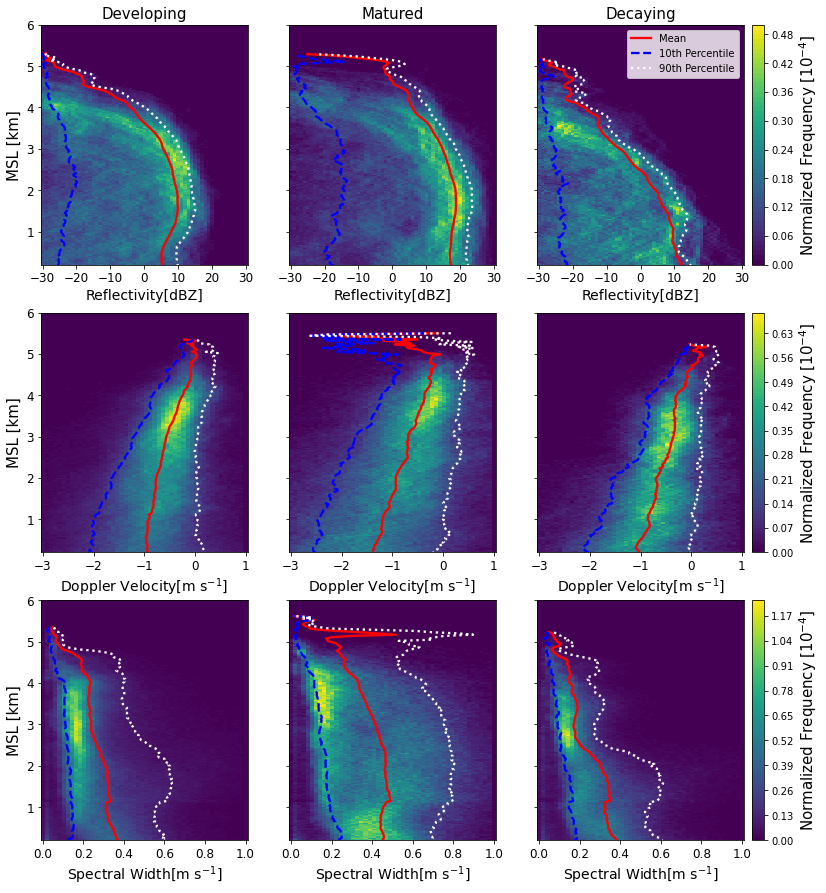

In [14]:
%%time
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Specify the bin edges for reflectivity, Doppler velocity, and spectral width
bin_reflectivity = np.linspace(-30, 30, num=61)
bin_velocity = np.linspace(-3, 1, num=50)
bin_width = np.linspace(0, 1, num=50)

# Define custom tick values for x-axis
x_ticks_reflectivity = [-30, -20, -10, 0, 10, 20, 30]
x_ticks_velocity = [-3, -2, -1, 0, 1, 2, 3]
x_ticks_width = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create a list of data types and titles for the subplots
data_types = [reflectivity, doppler_velocity, spectral_width]
titles = [
    ['Reflectivity[dBZ]', 'Reflectivity[dBZ]', 'Reflectivity[dBZ]'],
    ['Doppler Velocity[m s$^{-1}$]', 'Doppler Velocity[m s$^{-1}$]', 'Doppler Velocity[m s$^{-1}$]'],
    ['Spectral Width[m s$^{-1}$]', 'Spectral Width[m s$^{-1}$]', 'Spectral Width[m s$^{-1}$]']
]

cbar_axes = []  # Create a list to store the colorbar axes

for i in range(3):
    # Iterate through different data types (reflectivity, velocity, and width)
    for j, time_ranges in enumerate([ref_time_ranges_developing, ref_time_ranges_matured, ref_time_ranges_decay]):
        data_slices = []
        for start_time, end_time in time_ranges:
            data_slice = data_types[i].sel(time=slice(start_time, end_time))
            data_slices.append(data_slice)
        cell_data = xr.concat(data_slices, dim='time')

        # Call the cfad function based on the data type
        if i == 0:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_reflectivity,
                height=height, h=len(height), colormap='viridis',
                type='ref'
            )
        elif i == 1:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_velocity,
                height=height, h=len(height), colormap='viridis',
                type='vel'
            )
        else:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_width,
                height=height, h=len(height), colormap='viridis',
                type='sw'
            )

        # Create a pcolormesh plot on the current subplot
        cf = axes[i, j].pcolormesh(bin, height / 1000, np.transpose(frequency), cmap=cmap, norm=norm)

        # Set x-axis ticks based on the data type
        if i == 0:
            axes[i, j].set_xticks(x_ticks_reflectivity)
        elif i == 1:
            axes[i, j].set_xticks(x_ticks_velocity)
        else:
            axes[i, j].set_xticks(x_ticks_width)

        # Set subplot titles
        axes[0, 0].set_title('Developing', fontsize=15)
        axes[0, 1].set_title('Matured', fontsize=15)
        axes[0, 2].set_title('Decaying', fontsize=15)
        axes[i, j].set_ylim(0.2, 6)

        # Set y-labels for the subplots
        axes[0, 0].set_ylabel("MSL [km]", fontsize=15)
        axes[1, 0].set_ylabel("MSL [km]", fontsize=15)
        axes[2, 0].set_ylabel("MSL [km]", fontsize=15)

        # Set x-labels for the subplots
        axes[i, j].set_xlabel(titles[i][j], fontsize=14)
        axes[i, j].tick_params(axis='both', which='major', labelsize=12)

        # Plot mean, 10th percentile, and 90th percentile lines
        hlim = 205
        axes[i, j].plot(ref_ave[:hlim], height[:hlim] / 1000, c='red', linewidth=2.3, label='Mean')
        axes[i, j].plot(ref_10[:hlim], height[:hlim] / 1000, ls='--', c='blue', linewidth=2.3, label='10th Percentile')
        axes[i, j].plot(ref_90[:hlim], height[:hlim] / 1000, ls='dotted', c='white', linewidth=2.3, label='90th Percentile')

        # Set legend for the last subplot in the row
        axes[0, 2].legend()

    # Create a colorbar for each row and append the colorbar axes to the list
    cbar = fig.colorbar(cf, ax=axes[i, :], orientation='vertical', shrink=1.0, pad=0.01)
    cbar.set_label("Normalized Frequency [10$^{-4}$]", fontsize=15)

    # Define custom colorbar ticks and labels
    current_ticks = cbar.get_ticks()
    if i == 0:
        cbar.set_ticks(current_ticks)
        cbar.set_ticklabels(['0.00', '0.06', '0.12', '0.18', '0.24', '0.30', '0.36', '0.42', '0.48'])
    elif i == 1:
        cbar.set_ticks(current_ticks)
        cbar.set_ticklabels(['0.00', '0.07', '0.14', '0.21', '0.28', '0.35', '0.42', '0.49', '0.56', '0.63'])
        
    else:
        cbar.set_ticks(current_ticks)
        cbar.set_ticklabels(['0.00', '0.13', '0.26', '0.39', '0.52', '0.65', '0.78', '0.91', '1.04', '1.17'])
    cbar_axes.append(cbar.ax)

# Save the figure in two formats
plt.savefig("./CFAD/cfad.jpg", dpi=1000, bbox_inches='tight')
plt.savefig("./CFAD/cfad.png", dpi=1000, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CPU times: user 23.4 s, sys: 980 ms, total: 24.4 s
Wall time: 25.1 s


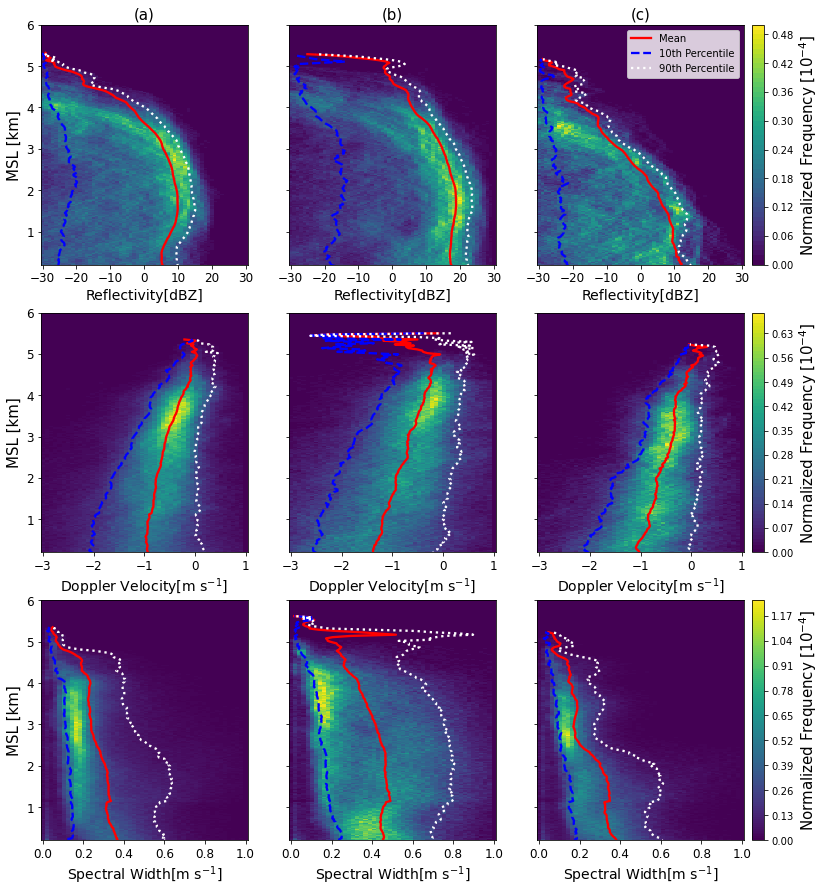

In [15]:
%%time
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

# Specify the bin edges for reflectivity, Doppler velocity, and spectral width
bin_reflectivity = np.linspace(-30, 30, num=61)
bin_velocity = np.linspace(-3, 1, num=50)
bin_width = np.linspace(0, 1, num=50)

# Define custom tick values for x-axis
x_ticks_reflectivity = [-30, -20, -10, 0, 10, 20, 30]
x_ticks_velocity = [-3, -2, -1, 0, 1, 2, 3]
x_ticks_width = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Create a list of data types and titles for the subplots
data_types = [reflectivity, doppler_velocity, spectral_width]
titles = [
    ['Reflectivity[dBZ]', 'Reflectivity[dBZ]', 'Reflectivity[dBZ]'],
    ['Doppler Velocity[m s$^{-1}$]', 'Doppler Velocity[m s$^{-1}$]', 'Doppler Velocity[m s$^{-1}$]'],
    ['Spectral Width[m s$^{-1}$]', 'Spectral Width[m s$^{-1}$]', 'Spectral Width[m s$^{-1}$]']
]

cbar_axes = []  # Create a list to store the colorbar axes

for i in range(3):
    # Iterate through different data types (reflectivity, velocity, and width)
    for j, time_ranges in enumerate([ref_time_ranges_developing, ref_time_ranges_matured, ref_time_ranges_decay]):
        data_slices = []
        for start_time, end_time in time_ranges:
            data_slice = data_types[i].sel(time=slice(start_time, end_time))
            data_slices.append(data_slice)
        cell_data = xr.concat(data_slices, dim='time')

        # Call the cfad function based on the data type
        if i == 0:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_reflectivity,
                height=height, h=len(height), colormap='viridis',
                type='ref'
            )
        elif i == 1:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_velocity,
                height=height, h=len(height), colormap='viridis',
                type='vel'
            )
        else:
            bin, height, frequency, cmap, norm, ref_ave, ref_10, ref_90 = cfad(
                data=cell_data.values, bin=bin_width,
                height=height, h=len(height), colormap='viridis',
                type='sw'
            )

        # Create a pcolormesh plot on the current subplot
        cf = axes[i, j].pcolormesh(bin, height / 1000, np.transpose(frequency), cmap=cmap, norm=norm)

        # Set x-axis ticks based on the data type
        if i == 0:
            axes[i, j].set_xticks(x_ticks_reflectivity)
        elif i == 1:
            axes[i, j].set_xticks(x_ticks_velocity)
        else:
            axes[i, j].set_xticks(x_ticks_width)

        # Set subplot titles
        axes[0, 0].set_title('(a)', fontsize=15)
        axes[0, 1].set_title('(b)', fontsize=15)
        axes[0, 2].set_title('(c)', fontsize=15)
        axes[i, j].set_ylim(0.2, 6)

        # Set y-labels for the subplots
        axes[0, 0].set_ylabel("MSL [km]", fontsize=15)
        axes[1, 0].set_ylabel("MSL [km]", fontsize=15)
        axes[2, 0].set_ylabel("MSL [km]", fontsize=15)

        # Set x-labels for the subplots
        axes[i, j].set_xlabel(titles[i][j], fontsize=14)
        axes[i, j].tick_params(axis='both', which='major', labelsize=12)

        # Plot mean, 10th percentile, and 90th percentile lines
        hlim = 205
        axes[i, j].plot(ref_ave[:hlim], height[:hlim] / 1000, c='red', linewidth=2.3, label='Mean')
        axes[i, j].plot(ref_10[:hlim], height[:hlim] / 1000, ls='--', c='blue', linewidth=2.3, label='10th Percentile')
        axes[i, j].plot(ref_90[:hlim], height[:hlim] / 1000, ls='dotted', c='white', linewidth=2.3, label='90th Percentile')

        # Set legend for the last subplot in the row
        axes[0, 2].legend()

    # Create a colorbar for each row and append the colorbar axes to the list
    cbar = fig.colorbar(cf, ax=axes[i, :], orientation='vertical', shrink=1.0, pad=0.01)
    cbar.set_label("Normalized Frequency [10$^{-4}$]", fontsize=15)

    # Define custom colorbar ticks and labels
    current_ticks = cbar.get_ticks()
    if i == 0:
        cbar.set_ticks(current_ticks)
        cbar.set_ticklabels(['0.00', '0.06', '0.12', '0.18', '0.24', '0.30', '0.36', '0.42', '0.48'])
    elif i == 1:
        cbar.set_ticks(current_ticks)
        cbar.set_ticklabels(['0.00', '0.07', '0.14', '0.21', '0.28', '0.35', '0.42', '0.49', '0.56', '0.63'])
        
    else:
        cbar.set_ticks(current_ticks)
        cbar.set_ticklabels(['0.00', '0.13', '0.26', '0.39', '0.52', '0.65', '0.78', '0.91', '1.04', '1.17'])
    cbar_axes.append(cbar.ax)

# Save the figure in two formats
plt.savefig("./CFAD/cfad-pub.jpg", dpi=1000, bbox_inches='tight')
plt.savefig("./CFAD/cfad-pub.png", dpi=1000, bbox_inches='tight')

In [16]:
merged_data_lwp_dev = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(lwp_time_ranges_developing[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    lwp_ds =  lwp.where((lwp.time >= start_time) & (lwp.time <= end_time), drop=True)
    # Replace NaN values with 0
    lwp_ds = lwp_ds.fillna(0)
    merged_data_lwp_dev.append(lwp_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_lwp_dev:
    merged_data_lwp_dev = xr.concat(merged_data_lwp_dev, dim="time")
print(merged_data_lwp_dev.data)  # Access the data of the merged DataArray


############################
merged_data_lwp_mat = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(lwp_time_ranges_matured[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    lwp_ds = lwp.where((lwp.time >= start_time) & (lwp.time <= end_time), drop=True)
    # Replace NaN values with 0
    lwp_ds = lwp_ds.fillna(0)
    merged_data_lwp_mat.append(lwp_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_lwp_mat:
    merged_data_lwp_mat = xr.concat(merged_data_lwp_mat, dim="time")

print(merged_data_lwp_mat.data)  # Access the data of the merged DataArray

#######################

merged_data_lwp_dec = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(lwp_time_ranges_decay[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    lwp_ds = lwp.where((lwp.time >= start_time) & (lwp.time <= end_time), drop=True)
    # Replace NaN values with 0
    lwp_ds = lwp_ds.fillna(0)
    merged_data_lwp_dec.append(lwp_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_lwp_dec:
    merged_data_lwp_dec = xr.concat(merged_data_lwp_dec, dim="time")
print(merged_data_lwp_dec.data)  # Access the data of the merged DataArray

[-23.70861  -27.468624 -27.468624 ... 359.6911   359.6911   359.6911  ]
[ 0.       0.       0.      ... 72.83026 76.16432 76.16432]
[-6.4073477 -6.4073477 -6.4073477 ...  0.         0.         0.       ]


In [17]:
merged_data_precip_dev = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(precip_time_ranges_developing[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    precip_ds = precip_rate.where((precip_rate.time >= start_time) & (precip_rate.time <= end_time), drop=True)
    # Replace NaN values with 0
    precip_ds = precip_ds.fillna(0)
    merged_data_precip_dev.append(precip_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_precip_dev:
    merged_data_precip_dev = xr.concat(merged_data_precip_dev, dim="time")
print(merged_data_precip_dev.data)  # Access the data of the merged DataArray


merged_data_precip_mat = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(precip_time_ranges_matured[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    precip_ds = precip_rate.where((precip_rate.time >= start_time) & (precip_rate.time <= end_time), drop=True)
    # Replace NaN values with 0
    precip_ds = precip_ds.fillna(0)
    merged_data_precip_mat.append(precip_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_precip_mat:
    merged_data_precip_mat = xr.concat(merged_data_precip_mat, dim="time")
print(merged_data_precip_mat.data)  # Access the data of the merged DataArray


merged_data_precip_dec = []  # Initialize an empty list to store merged DataArrays
for index, [start_time, end_time] in enumerate(precip_time_ranges_decay[::]):
    # Convert start_time and end_time to pandas datetime objects
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    # Use where with the datetime conditions
    precip_ds = precip_rate.where((precip_rate.time >= start_time) & (precip_rate.time <= end_time), drop=True)
    # Replace NaN values with 0
    precip_ds = precip_ds.fillna(0)
    merged_data_precip_dec.append(precip_ds)  # Append the DataArray to the list
# Concatenate all DataArrays into a single DataArray
if merged_data_precip_dec:
    merged_data_precip_dec = xr.concat(merged_data_precip_dec, dim="time")
print(merged_data_precip_dec.data)  # Access the data of the merged DataArray

[0. 0. 0. ... 0. 0. 0.]
[0.   0.   0.   ... 0.01 0.01 0.01]
[0.   0.   0.   ... 1.81 1.81 0.88]


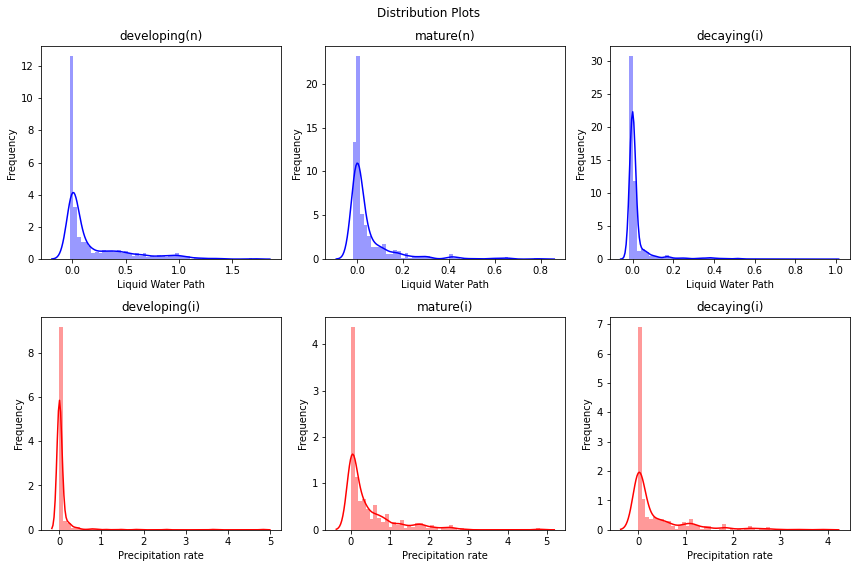

In [18]:
# Your data lists
a = merged_data_lwp_dev/1000
b = merged_data_lwp_mat/1000
c = merged_data_lwp_dec/1000
d = merged_data_precip_dev
e = merged_data_precip_mat
f = merged_data_precip_dec

# Define custom color palettes for the first and last rows
row_colors = ["blue" if i < 3 else "red" for i in range(6)]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Distribution Plots")

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create distribution plots for each row with the specified colors
plot_labels = ['developing(n)', 'mature(n)', 'decaying(i)', 'developing(i)', 'mature(i)', 'decaying(i)']

for i, data in enumerate([a, b, c, d, e, f]):
    sns.distplot(data, ax=axes[i], kde=True, color=row_colors[i])
    axes[i].set_title(f"{plot_labels[i]}")
    axes[i].set_ylabel("Frequency")
    if ((i == 0) or (i == 1) or (i == 2)):
        axes[i].set_xlabel("Liquid Water Path")
    else:
        axes[i].set_xlabel("Precipitation rate")

# Adjust layout
plt.tight_layout()

# Save the plot with custom colors
plt.savefig("dist.jpg", dpi=300, bbox_inches='tight')

# Show the subplots
plt.show()


In [19]:
# fig, ax = plt.subplots(1, 3, figsize=(28, 5))
# ax = ax.flatten()

# sns.violinplot(x=merged_data_lwp_dev/1000, ax=ax[0], color='royalblue', linewidth=3)
# sns.violinplot(x=merged_data_lwp_mat/1000, ax=ax[1], color='royalblue', linewidth=3)
# sns.violinplot(x=merged_data_lwp_dec/1000, ax=ax[2], color='royalblue', linewidth=3)
# ax[0].grid(color='gray', alpha=0.1)
# ax[1].grid(color='gray', alpha=0.1)
# ax[2].grid(color='gray', alpha=0.1)

In [20]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax = ax.flatten()

# # Set the color for the quartiles, maximum, and minimum to red
# sns.violinplot(x=merged_data_lwp_dev/1000, ax=ax[0], color='royalblue', width=0.6, linewidth=3, saturation=1,)
# sns.violinplot(x=merged_data_lwp_mat/1000, ax=ax[1], color='royalblue', width=0.6, linewidth=3, saturation=1)
# sns.violinplot(x=merged_data_lwp_dec/1000, ax=ax[2], color='royalblue', width=0.6, linewidth=3, saturation=1)

# # Optionally, you can also set the edgecolor of the violins to make them stand out more
# for i in range(3):
#     for patch in ax[i].collections:
#         patch.set_edgecolor('black')

# # Set the quartile, maximum, and minimum lines to red
# for i in range(3):
#     for l in ax[i].lines:
#         l.set_color('black')

# ax[0].grid(color='gray', alpha=0.1)
# ax[1].grid(color='gray', alpha=0.1)
# ax[2].grid(color='gray', alpha=0.1)

In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 3, figsize=(18, 3))
# ax = ax.flatten()

# # Set the color for the quartiles, maximum, and minimum to red
# sns.violinplot(x=merged_data_precip_dev, ax=ax[0], color='crimson', linewidth=3, saturation=1)
# sns.violinplot(x=merged_data_precip_mat, ax=ax[1], color='crimson', linewidth=3, saturation=1)
# sns.violinplot(x=merged_data_precip_dec, ax=ax[2], color='crimson', linewidth=3, saturation=1)

# # Optionally, you can also set the edgecolor of the violins to make them stand out more
# for i in range(3):
#     for patch in ax[i].collections:
#         patch.set_edgecolor('black')

# # Set the quartile, maximum, and minimum lines to red
# for i in range(3):
#     for l in ax[i].lines:
#         l.set_color('black')

# ax[0].grid(color='gray', alpha=0.1)
# ax[1].grid(color='gray', alpha=0.1)
# ax[2].grid(color='gray', alpha=0.1)

In [22]:
# fig, ax = plt.subplots(2, 3, figsize=(16, 6))
# ax = ax.flatten()

# # Define datasets for the example
# datasets = [df['lwp-dev'], df['lwp-mat'], df['lwp-dec'], df['precip-dev'], df['precip-mat'], df['precip-dec']]

# colors = ['royalblue', 'royalblue', 'royalblue', 'crimson', 'crimson', 'crimson']

#  # Label the columns (a), (b), (c)
# column_labels = ['(a)', '(b)', '(c)']

# # Plot the horizontal violin plots with inner boxplots
# for i, (data, color) in enumerate(zip(datasets, colors)):
#     # if ((i == 0) or (i == 1)):
#     #     sns.violinplot(x=data, ax=ax[i], color=color, linewidth=3, inner="box", orient='h', bw="scott")
#     # else:
#     sns.violinplot(x=data, ax=ax[i], color=color, linewidth=3, inner="box", orient='h', bw=0.5)
    
        
    
#     # Overlay median (box shape) and mean (star shape)
#     median = np.median(data)
#     mean = np.mean(data)
#     ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
#     ax[i].scatter(mean, 0, marker='*', color='red', s=30, zorder=3) # Star shape for mean
#     ax[i].grid(color='gray', alpha=0.1)
    

# # Set the quartile, maximum, and minimum lines to red
# for i in range(6):
#     if i == 0:
#         ax[i].set_ylabel("LWP [kg m$^{-2}$]")
#     if i == 2:
#         ax[i].set_xlabel("LWP [kg m$^{-2}$]")
#     if i == 3:
#         ax[i].set_ylabel("Precipiation Rate [mmh$^{-1}$]")
#     ax[i].set_xlabel("")
#     for l in ax[i].lines:
#         l.set_color('black')
        
        
# for i in range(3):
#     ax[i].text(0.05, 0.95, column_labels[i], transform=ax[i].transAxes, fontsize=14, fontweight='bold', va='top')

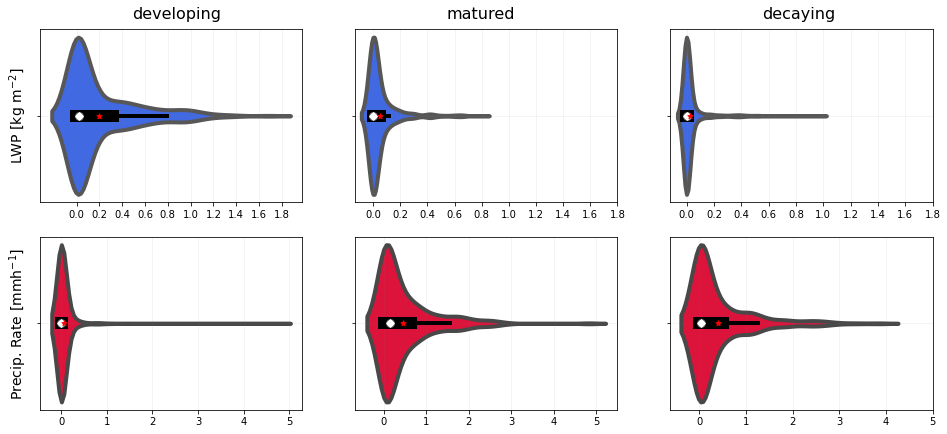

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7))
ax = ax.flatten()

# Define datasets for the example
datasets = [merged_data_lwp_dev/1000, merged_data_lwp_mat/1000, merged_data_lwp_dec/1000,
            merged_data_precip_dev, merged_data_precip_mat, merged_data_precip_dec]

colors = ['royalblue', 'royalblue', 'royalblue', 'crimson', 'crimson', 'crimson']
 # Label the columns (a), (b), (c)
column_labels = ['developing', 'matured', 'decaying']
# Plot the horizontal violin plots with inner boxplots
for i, (data, color) in enumerate(zip(datasets, colors)):
    # if ((i == 0) or (i == 1)):
    #     sns.violinplot(x=data, ax=ax[i], color=color, linewidth=3, inner="box", orient='h', bw="scott")
    # else:
    sns.violinplot(x=data, ax=ax[i], color=color, linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
    # Set the x-axis limit to start from 0
    # ax[i].set_xlim(0, ax[i].get_xlim()[1])

        
    
    # Overlay median (box shape) and mean (star shape)
    median = np.median(data)
    mean = np.mean(data)
    ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
    ax[i].scatter(mean, 0, marker='*', color='red', s=30, zorder=3) # Star shape for mean
    ax[i].grid(color='gray', alpha=0.1)
    

# Set the quartile, maximum, and minimum lines to red
for i in range(6):
    if ((i == 0) or (i ==1) or (i ==2)):
        ax[i].set_xticks(np.arange(0, 2.0, 0.2))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
    else:
        ax[i].set_xticks(np.arange(0, 5.1, 1))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
    
    if i == 0:
        ax[i].set_ylabel("LWP [kg m$^{-2}$]", fontsize=14)
    if i == 3:
        ax[i].set_ylabel("Precip. Rate [mmh$^{-1}$]", fontsize=14)
    ax[i].set_xlabel("")
    for l in ax[i].lines:
        l.set_color('black')
        
        
for i in range(3):
    ax[i].text(0.35, 1.13, column_labels[i], transform=ax[i].transAxes, fontsize=16, va='top')
    
# plt.tight_layout()
# Save the figure in two formats
# plt.savefig("./distribution/lwp-pr.jpg", dpi=1000, bbox_inches='tight')
# plt.savefig("./distribution/lwp-pr.png", dpi=1000, bbox_inches='tight')

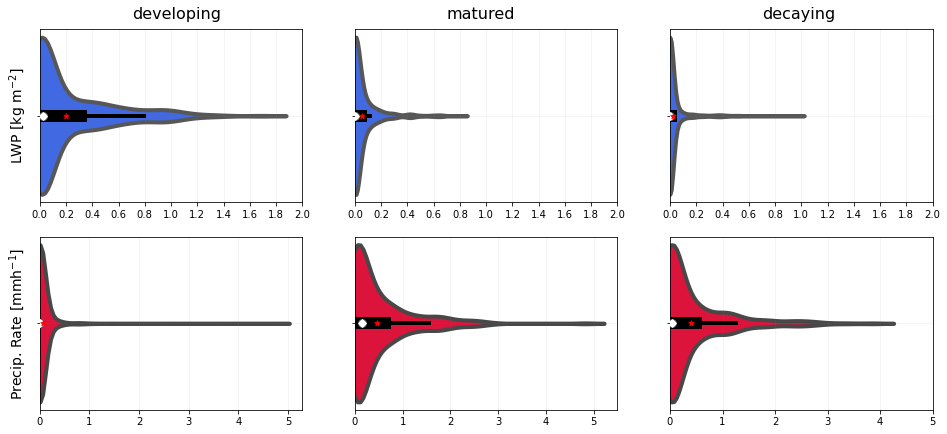

In [34]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7))
ax = ax.flatten()

# Define datasets for the example
datasets = [merged_data_lwp_dev/1000, merged_data_lwp_mat/1000, merged_data_lwp_dec/1000,
            merged_data_precip_dev, merged_data_precip_mat, merged_data_precip_dec]

colors = ['royalblue', 'royalblue', 'royalblue', 'crimson', 'crimson', 'crimson']
 # Label the columns (a), (b), (c)
column_labels = ['developing', 'matured', 'decaying']
# Plot the horizontal violin plots with inner boxplots
for i, (data, color) in enumerate(zip(datasets, colors)):
    # if ((i == 0) or (i == 1)):
    #     sns.violinplot(x=data, ax=ax[i], color=color, linewidth=3, inner="box", orient='h', bw="scott")
    # else:
    sns.violinplot(x=data, ax=ax[i], color=color, linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
    # Set the x-axis limit to start from 0
    ax[i].set_xlim(0, ax[i].get_xlim()[1])

        
    
    # Overlay median (box shape) and mean (star shape)
    median = np.median(data)
    mean = np.mean(data)
    ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
    ax[i].scatter(mean, 0, marker='*', color='red', s=30, zorder=3) # Star shape for mean
    ax[i].grid(color='gray', alpha=0.1)
    

# Set the quartile, maximum, and minimum lines to red
for i in range(6):
    if ((i == 0) or (i ==1) or (i ==2)):
        ax[i].set_xticks(np.arange(0, 2.2, 0.2))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
    else:
        ax[i].set_xticks(np.arange(0, 5.1, 1))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
    
    if i == 0:
        ax[i].set_ylabel("LWP [kg m$^{-2}$]", fontsize=14)
    if i == 3:
        ax[i].set_ylabel("Precip. Rate [mmh$^{-1}$]", fontsize=14)
    ax[i].set_xlabel("")
    for l in ax[i].lines:
        l.set_color('black')
        
        
for i in range(3):
    ax[i].text(0.35, 1.13, column_labels[i], transform=ax[i].transAxes, fontsize=16, va='top')
    
# plt.tight_layout()
# plt.savefig("./distribution/lwp-pr-0.jpg", dpi=1000, bbox_inches='tight')
# plt.savefig("./distribution/lwp-pr-0.png", dpi=1000, bbox_inches='tight')

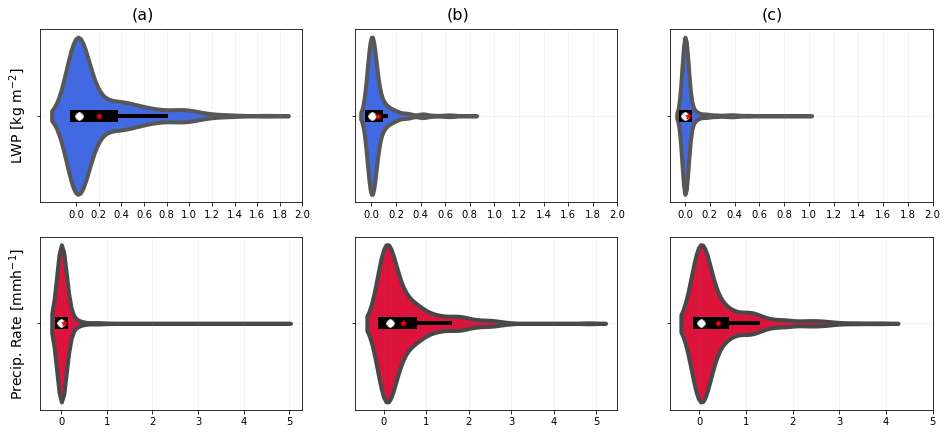

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7))
ax = ax.flatten()

# Define datasets for the example
datasets = [merged_data_lwp_dev/1000, merged_data_lwp_mat/1000, merged_data_lwp_dec/1000,
            merged_data_precip_dev, merged_data_precip_mat, merged_data_precip_dec]

colors = ['royalblue', 'royalblue', 'royalblue', 'crimson', 'crimson', 'crimson']
 # Label the columns (a), (b), (c)
column_labels = ['(a)', '(b)', '(c)']
# Plot the horizontal violin plots with inner boxplots
for i, (data, color) in enumerate(zip(datasets, colors)):
    # if ((i == 0) or (i == 1)):
    #     sns.violinplot(x=data, ax=ax[i], color=color, linewidth=3, inner="box", orient='h', bw="scott")
    # else:
    sns.violinplot(x=data, ax=ax[i], color=color, linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
    # Set the x-axis limit to start from 0
    # ax[i].set_xlim(0, ax[i].get_xlim()[1])

        
    
    # Overlay median (box shape) and mean (star shape)
    median = np.median(data)
    mean = np.mean(data)
    ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
    ax[i].scatter(mean, 0, marker='*', color='red', s=30, zorder=3) # Star shape for mean
    ax[i].grid(color='gray', alpha=0.1)
    

# Set the quartile, maximum, and minimum lines to red
for i in range(6):
    if ((i == 0) or (i ==1) or (i ==2)):
        ax[i].set_xticks(np.arange(0, 2.2, 0.2))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
    else:
        ax[i].set_xticks(np.arange(0, 5.1, 1))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
    
    if i == 0:
        ax[i].set_ylabel("LWP [kg m$^{-2}$]", fontsize=14)
    if i == 3:
        ax[i].set_ylabel("Precip. Rate [mmh$^{-1}$]", fontsize=14)
    ax[i].set_xlabel("")
    for l in ax[i].lines:
        l.set_color('black')
        
        
for i in range(3):
    ax[i].text(0.35, 1.13, column_labels[i], transform=ax[i].transAxes, fontsize=16, va='top')
    
# plt.tight_layout()
# Save the figure in two formats
# plt.savefig("./distribution/lwp-pr.jpg", dpi=1000, bbox_inches='tight')
# plt.savefig("./distribution/lwp-pr.png", dpi=1000, bbox_inches='tight')

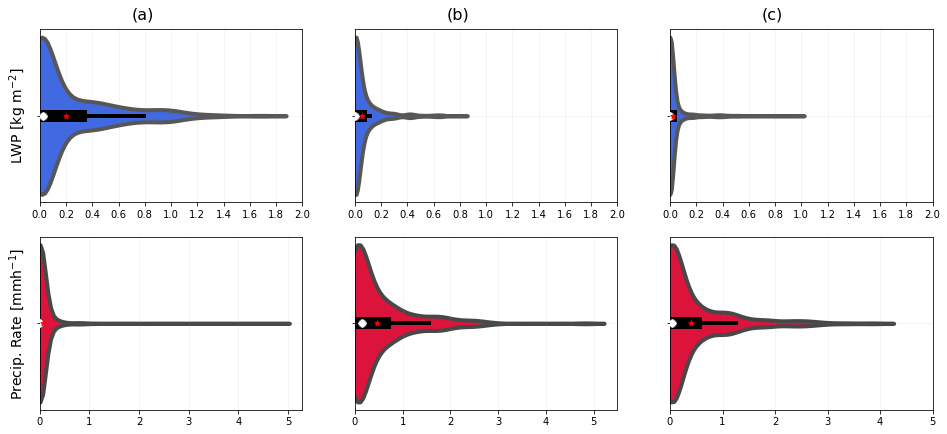

In [36]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7))
ax = ax.flatten()

# Define datasets for the example
datasets = [merged_data_lwp_dev/1000, merged_data_lwp_mat/1000, merged_data_lwp_dec/1000,
            merged_data_precip_dev, merged_data_precip_mat, merged_data_precip_dec]

colors = ['royalblue', 'royalblue', 'royalblue', 'crimson', 'crimson', 'crimson']
 # Label the columns (a), (b), (c)
column_labels = ['(a)', '(b)', '(c)']
# Plot the horizontal violin plots with inner boxplots
for i, (data, color) in enumerate(zip(datasets, colors)):
    # if ((i == 0) or (i == 1)):
    #     sns.violinplot(x=data, ax=ax[i], color=color, linewidth=3, inner="box", orient='h', bw="scott")
    # else:
    sns.violinplot(x=data, ax=ax[i], color=color, linewidth=4, inner="box", orient='h', bw=0.3, saturation=1)
    # Set the x-axis limit to start from 0
    ax[i].set_xlim(0, ax[i].get_xlim()[1])

        
    
    # Overlay median (box shape) and mean (star shape)
    median = np.median(data)
    mean = np.mean(data)
    ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
    ax[i].scatter(mean, 0, marker='*', color='red', s=30, zorder=3) # Star shape for mean
    ax[i].grid(color='gray', alpha=0.1)
    

# Set the quartile, maximum, and minimum lines to red
for i in range(6):
    if ((i == 0) or (i ==1) or (i ==2)):
        ax[i].set_xticks(np.arange(0, 2.2, 0.2))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
    else:
        ax[i].set_xticks(np.arange(0, 5.1, 1))  # Set tick positions at 0, 0.2, 0.4, ..., 2.0
    
    if i == 0:
        ax[i].set_ylabel("LWP [kg m$^{-2}$]", fontsize=14)
    if i == 3:
        ax[i].set_ylabel("Precip. Rate [mmh$^{-1}$]", fontsize=14)
    ax[i].set_xlabel("")
    for l in ax[i].lines:
        l.set_color('black')
        
        
for i in range(3):
    ax[i].text(0.35, 1.13, column_labels[i], transform=ax[i].transAxes, fontsize=16, va='top')
    
# plt.tight_layout()
# plt.savefig("./distribution/lwp-pr-0.jpg", dpi=1000, bbox_inches='tight')
# plt.savefig("./distribution/lwp-pr-0.png", dpi=1000, bbox_inches='tight')

In [37]:
dataset

<xarray.Dataset>
Dimensions:                               (time: 43200, layer: 10, height: 596, radar_mode: 4)
Coordinates:
  * time                                  (time) datetime64[ns] 2020-03-13 .....
  * layer                                 (layer) int32 0 1 2 3 4 5 6 7 8 9
  * height                                (height) float32 160.0 ... 1.801e+04
  * radar_mode                            (radar_mode) |S2 b'hi' b'md' ... b'pr'
Data variables: (12/33)
    base_time                             (time) datetime64[ns] ...
    time_offset                           (time) datetime64[ns] ...
    reflectivity_best_estimate            (time, height) float32 ...
    qc_reflectivity_best_estimate         (time, height) int32 ...
    reflectivity                          (time, height) float32 ...
    qc_reflectivity                       (time, height) int32 ...
    ...                                    ...
    minimum_detectable_reflectivity_flag  (time, height) float32 ...
    reflectivity_saturation_flag          (time, height) float32 ...
    instrument_availability_flag          (time) int16 ...
    lat                                   (time) float32 ...
    lon                                   (time) float32 ...
    alt                                   (time) float32 ...
Attributes: (12/18)
    command_line:                     idl -R -n kazrcfrarscl -n kazrcfrarsclc...
    Conventions:                      ARM-1.2
    process_version:                  vap-kazrcfrarscl-1.6-4.el7
    dod_version:                      arsclkazr1kollias-c1-4.0
    site_id:                          anx
    platform_id:                      arsclkazr1kollias
    ...                               ...
    radar_modes_in_use:               md ge
    maximum_clutter_height:           Not applicable at this site
    radar_operating_frequency_burst:      34.830 GHz
    radar_operating_frequency_chirp:      34.890 GHz
    doi:                              10.5439/1228768
    history:                          created by user malynn on machine node1...

In [70]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# fig, ax = plt.subplots(2, 3, figsize=(16, 5))
# ax = ax.flatten()

# # Define datasets for the example
# datasets = [merged_data_lwp_dev/1000, merged_data_lwp_mat/1000, merged_data_lwp_dec/1000,
#             merged_data_precip_dev, merged_data_precip_mat, merged_data_precip_dec]

# colors = ['blue', 'blue', 'blue', 'red', 'red', 'red']

# # Plot the horizontal violin plots with inner boxplots
# for i, (data, color) in enumerate(zip(datasets, colors)):
#     violin = sns.violinplot(x=data, ax=ax[i], color=color, linewidth=3, inner="box", orient='h', bw=0.5)
    
#     # Overlay median (box shape) and mean (star shape)
#     median = np.median(data)
#     mean = np.mean(data)
#     ax[i].scatter(median, 0, marker='D', color='white', s=30, zorder=3) # Box shape for median
#     ax[i].scatter(mean, 0, marker='|', color='black', s=100, zorder=3) # Star shape for mean

#     # Customize the color of quartiles, maximum, and minimum ranges to red
#     for patch in violin.artists:
#         patch.set_edgecolor('red')
#         patch.set_facecolor('')

#     ax[i].grid(color='gray', alpha=0.1)

# plt.show()
